In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv("ocean.csv")

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [93]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [37]:
df.shape

(864863, 74)

In [38]:
df_reduce = df[["Salnty","T_degC","Depthm"]]

In [39]:
df_reduce.shape

(864863, 3)

In [40]:
df_reduce.isnull().any()

Salnty     True
T_degC     True
Depthm    False
dtype: bool

In [41]:
df_reduce.Salnty.isnull().value_counts()

False    817509
True      47354
Name: Salnty, dtype: int64

In [42]:
df_reduce.T_degC.isnull().value_counts()

False    853900
True      10963
Name: T_degC, dtype: int64

In [43]:
df_reduce = df_reduce.dropna()
df_reduce.reset_index(drop=True,inplace=True)

In [44]:
df_reduce.shape

(814247, 3)

In [45]:
df_reduce.corr()

,Salnty,T_degC,Depthm
Salnty,1.000000,-0.505266,0.572867
T_degC,-0.505266,1.000000,-0.676504
Depthm,0.572867,-0.676504,1.000000


In [46]:
#sns.pairplot(df_reduce)

In [47]:
df_reduce_ex = df_reduce[0:800]

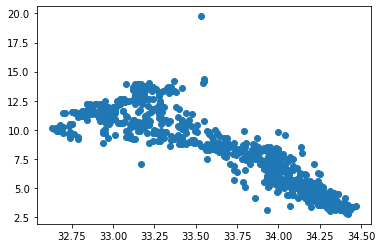

In [48]:
plt.scatter(df_reduce_ex["Salnty"],df_reduce_ex["T_degC"])

In [72]:
x = df_reduce_ex[["Salnty"]]
y = df_reduce_ex["T_degC"]

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [75]:
model.fit(x_train, y_train)

LinearRegression()

In [76]:
print(model.coef_)
print(model.intercept_)

[-5.192002]
182.96698661713904


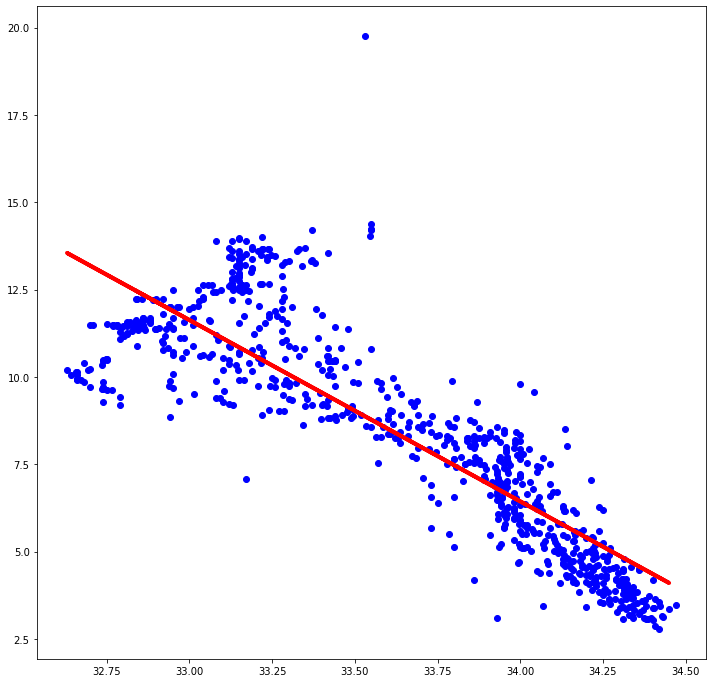

In [77]:
plt.figure(figsize=(12,12))
plt.scatter(x, y, color="Blue")
plt.plot(x_train, model.predict(x_train), "-r", linewidth='4')

In [78]:
from sklearn.metrics import r2_score

In [79]:
ypred = model.predict(x_test)

In [80]:
r2_score(y_test, ypred)

0.7822861776883085

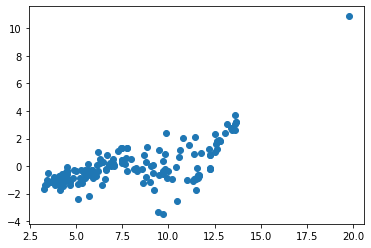

In [81]:
residuals = (y_test - ypred)
plt.scatter(y_test, residuals)

In [87]:
x2 = df_reduce[["Salnty"]]
y = df_reduce["T_degC"]

x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.2, random_state = 100)

model2 = LinearRegression()
model2.fit(x_train, y_train)
ypred = model2.predict(x_test)

print(model2.score(x_train, y_train))
print(r2_score(y_test, ypred))

0.2555720874771349
0.2541796569552889


In [88]:
x3 = df_reduce[["Salnty","Depthm"]]
y = df_reduce["T_degC"]

x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size = 0.2, random_state = 100)

model3 = LinearRegression()
model3.fit(x_train, y_train)
ypred = model3.predict(x_test)

print(model3.score(x_train, y_train))
print(r2_score(y_test, ypred))

0.4784206091627924
0.4777342757782441


In [28]:
df_reduce["new_t"] = 1 / df_reduce["T_degC"]**(1/2)

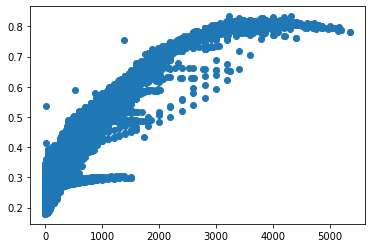

In [29]:
plt.scatter(df_reduce["Depthm"], df_reduce["new_t"])

In [30]:
x3 = df_reduce[["Salnty","Depthm"]]
y = np.array(df_reduce["new_t"]).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size = 0.2, random_state = 100)

model3 = LinearRegression()
model3.fit(x_train, y_train)
ypred = model3.predict(x_test)

print(model3.score(x_train, y_train))
print(r2_score(y_test, ypred))

0.8368850202474933
0.8348399514132405


In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("ocean.csv")

df_reduce2 = df[["Salnty","Depthm","pH2","T_degC","Oxy_µmol/Kg"]]
df_reduce2 = df_reduce2.dropna()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df_reduce2["T_degC"]
x = df_reduce2.drop(["T_degC"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = LinearRegression()
model.fit(x_train, y_train)

ypred = model.predict(x_test)

print(r2_score(y_test, ypred))

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0.7176136317033011


In [102]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 3)
fit = rfe.fit(x_train, y_train)

print(fit.n_features_)
print(fit.ranking_)

3
[1 2 1 1]


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


NameError: name 'x' is not defined